In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


data = pd.read_excel('finalcleanedData.xlsx')
data=data.drop([567, 636])
y=data['Output'].values
data.drop('Output', axis=1, inplace=True)
x=data.values.astype(np.float)




F:\conda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\conda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# **Linear Regression**

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify=y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [  8.41950422e-02   7.77092239e-02   2.04361181e-01   4.48077223e-02
  -7.80588268e-02   1.08641833e-01  -8.05453505e-02  -5.68972757e-02
   5.03000536e-03   2.71069235e-01   1.32512514e-02   1.71897709e-01
  -8.56306831e-02   1.28055934e-02   3.09362398e-01   1.86073461e-01
   4.51781715e-01   3.32047662e-01  -3.06316331e-01  -1.65364778e-01
   8.88085423e-02   6.89606561e-02  -4.17498118e-01  -1.30618866e-01
  -9.40387419e-02  -3.00720996e-01  -3.60514277e-01  -5.07735005e-01
  -7.49180683e-03  -6.95777274e-02  -7.48738545e-02   4.98062558e-03
  -3.56094045e-01  -8.60422844e-16  -3.39351056e-03   9.73844518e-03]
lr.intercept_: 0.8501070240340981
Training set score: 0.58
Test set score: 0.54


# Logistic regression without HT

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, x, y, cv=10, scoring='accuracy').mean())

0.877108910891


# SVR with HT

In [41]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR

# each parameter setting do cross-validation:
for C in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        scores = cross_val_score(SVR(C=C, gamma=gamma), x , y, cv=cv)
        print("C: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores)))

C: 0.001000, gamma: 0.001000, average score: -0.683498
C: 0.001000, gamma: 0.010000, average score: -0.708722
C: 0.001000, gamma: 0.100000, average score: -0.439350
C: 0.001000, gamma: 1.000000, average score: -0.607026
C: 0.010000, gamma: 0.001000, average score: -0.152116
C: 0.010000, gamma: 0.010000, average score: 0.269596
C: 0.010000, gamma: 0.100000, average score: 0.398234
C: 0.010000, gamma: 1.000000, average score: -0.567905
C: 0.100000, gamma: 0.001000, average score: 0.246444
C: 0.100000, gamma: 0.010000, average score: 0.507256
C: 0.100000, gamma: 0.100000, average score: 0.608741
C: 0.100000, gamma: 1.000000, average score: 0.183139
C: 1.000000, gamma: 0.001000, average score: 0.502024
C: 1.000000, gamma: 0.010000, average score: 0.630217
C: 1.000000, gamma: 0.100000, average score: 0.693926
C: 1.000000, gamma: 1.000000, average score: 0.304729
C: 10.000000, gamma: 0.001000, average score: 0.580272
C: 10.000000, gamma: 0.010000, average score: 0.673324
C: 10.000000, gamma:

# SVC with HT

In [43]:
###### finding best parameters for svm manually with cross validation #######
highestscore=0
cc=0
gg=0 

clist = [0.001,0.01,1,10,100,200,300]
gammalist = [0.01,0.5,1,5,10]

for c in clist:
    for g in gammalist:
        svm= SVC(C=c, gamma=g)
        scores = cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy')
        print("trees: %d, depth leaf:%d, average score: %f" % (c,g,scores.mean()))
        if highestscore < scores.mean():
            cc=c
            gg=g
            highestscore=scores.mean()
        
print(cc)
print(gg)
print(highestscore)

##### using grid search with cross validation and using best esitmator of svm for testing #######
grid_param = {'C': np.array([0.001,0.01,1,10,100,200,300]) , 'gamma':np.array([0.01,0.5,1,5,10])}
svm = SVC()
svmgdsr = GridSearchCV(estimator=svm,param_grid=grid_param,scoring='accuracy',cv=10,n_jobs=-1)
svmgdsr.fit(X_train, y_train)
print(svmgdsr.best_params_)
print(svmgdsr.best_score_)
print(svmgdsr.best_estimator_)
bestparamsvm=svmgdsr.best_estimator_
bestparamsvm.score(X_test, y_test)

trees: 0, depth leaf:0, average score: 0.503983
trees: 0, depth leaf:0, average score: 0.503983
trees: 0, depth leaf:1, average score: 0.503983
trees: 0, depth leaf:5, average score: 0.503983
trees: 0, depth leaf:10, average score: 0.503983
trees: 0, depth leaf:0, average score: 0.572861
trees: 0, depth leaf:0, average score: 0.503983
trees: 0, depth leaf:1, average score: 0.503983
trees: 0, depth leaf:5, average score: 0.503983
trees: 0, depth leaf:10, average score: 0.503983
trees: 1, depth leaf:0, average score: 0.865190
trees: 1, depth leaf:0, average score: 0.873119
trees: 1, depth leaf:1, average score: 0.821450
trees: 1, depth leaf:5, average score: 0.581884
trees: 1, depth leaf:10, average score: 0.518545
trees: 10, depth leaf:0, average score: 0.892963
trees: 10, depth leaf:0, average score: 0.875890
trees: 10, depth leaf:1, average score: 0.820152
trees: 10, depth leaf:5, average score: 0.597849
trees: 10, depth leaf:10, average score: 0.517229
trees: 100, depth leaf:0, avera

0.91699604743083007

# precision recall fmeasure SVC

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svmgdsr.predict(X_test)))


             precision    recall  f1-score   support

          0       0.90      0.94      0.92       128
          1       0.93      0.90      0.91       125

avg / total       0.92      0.92      0.92       253



# KNN with HT

In [45]:
###### finding best parameters for knn manually with crossvalidation #######
k_range = list(range(1, 25))
highestscore=0
kvalue=0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    print("K: %d, average score: %f" % (k,scores.mean()))
    if highestscore < scores.mean():
        kvalue=k
        highestscore=scores.mean()
print(highestscore)
print(kvalue)

###### using grid search with cross validation and using best esitmator of knn for testing #######
grid_param = {'n_neighbors':  np.arange(1, 25)}
knn = KNeighborsClassifier()
knngdsr = GridSearchCV(estimator=knn,param_grid=grid_param,scoring='accuracy',cv=10,n_jobs=-1)
knngdsr.fit(X_train, y_train)
print(knngdsr.best_params_)
print(knngdsr.best_score_)
print(knngdsr.best_estimator_)
bestparamknn=knngdsr.best_estimator_
bestparamknn.score(X_test, y_test)

K: 1, average score: 0.854732
K: 2, average score: 0.833469
K: 3, average score: 0.849329
K: 4, average score: 0.829399
K: 5, average score: 0.854506
K: 6, average score: 0.849173
K: 7, average score: 0.854506
K: 8, average score: 0.841312
K: 9, average score: 0.862523
K: 10, average score: 0.850663
K: 11, average score: 0.861294
K: 12, average score: 0.842645
K: 13, average score: 0.853260
K: 14, average score: 0.843961
K: 15, average score: 0.855892
K: 16, average score: 0.847927
K: 17, average score: 0.846594
K: 18, average score: 0.843874
K: 19, average score: 0.841260
K: 20, average score: 0.835979
K: 21, average score: 0.849207
K: 22, average score: 0.838663
K: 23, average score: 0.841295
K: 24, average score: 0.837260
0.862522670312
9
{'n_neighbors': 9}
0.8624338624338624
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


0.89723320158102771

# precision recall fmeasure KNN

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knngdsr.predict(X_test)))


             precision    recall  f1-score   support

          0       0.86      0.95      0.90       128
          1       0.95      0.84      0.89       125

avg / total       0.90      0.90      0.90       253



# DTC with HT

In [47]:
###### finding best parameters for dtc manually with crossvalidation #######
highestscore=0
valuedepth=0
valuesample=0

depth = list(range(1, 10))
sampleleaf = list(range(1, 10))

for d in depth:
    for s in sampleleaf:
        dtc= DecisionTreeClassifier(max_depth=d, min_samples_leaf =s)
        scores = cross_val_score(dtc, X_train, y_train, cv=10, scoring='accuracy')
        print("depth: %d, sample leaf:%d, average score: %f" % (d,s,scores.mean()))
        if highestscore < scores.mean():
            valuedepth=d
            valuesample=s
            highestscore=scores.mean()
        
print(valuedepth)
print(valuesample)
print(highestscore)

##### using grid search with cross validation and using best esitmator of dtc for testing #######
grid_param = {'max_depth':  np.arange(1, 10), 'min_samples_leaf':np.arange(1,10)}
dtc = DecisionTreeClassifier()
dtcgdsr = GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5,n_jobs=-1)
dtcgdsr.fit(X_train, y_train)
print(dtcgdsr.best_params_)
print(dtcgdsr.best_score_)
print(dtcgdsr.best_estimator_)
bestparamdtc=dtcgdsr.best_estimator_
bestparamdtc.score(X_test, y_test)

depth: 1, sample leaf:1, average score: 0.665392
depth: 1, sample leaf:2, average score: 0.665392
depth: 1, sample leaf:3, average score: 0.665392
depth: 1, sample leaf:4, average score: 0.665392
depth: 1, sample leaf:5, average score: 0.665392
depth: 1, sample leaf:6, average score: 0.665392
depth: 1, sample leaf:7, average score: 0.665392
depth: 1, sample leaf:8, average score: 0.665392
depth: 1, sample leaf:9, average score: 0.665392
depth: 2, sample leaf:1, average score: 0.699831
depth: 2, sample leaf:2, average score: 0.697199
depth: 2, sample leaf:3, average score: 0.697199
depth: 2, sample leaf:4, average score: 0.697199
depth: 2, sample leaf:5, average score: 0.697199
depth: 2, sample leaf:6, average score: 0.697199
depth: 2, sample leaf:7, average score: 0.697199
depth: 2, sample leaf:8, average score: 0.697199
depth: 2, sample leaf:9, average score: 0.697199
depth: 3, sample leaf:1, average score: 0.780433
depth: 3, sample leaf:2, average score: 0.777801
depth: 3, sample lea

0.88142292490118579

# precision recall fmeasure DTC

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtcgdsr.predict(X_test)))


             precision    recall  f1-score   support

          0       0.89      0.88      0.88       128
          1       0.87      0.89      0.88       125

avg / total       0.88      0.88      0.88       253



# RFC with HT

In [49]:
###### finding best parameters for rfc manually with cross validation #######
highestscore=0
numoftrees=0    #n_estimators 
maxdepth=0      #max_depth 

trees = list(range(1, 10))
depth = list(range(1, 10))

for t in trees:
    for d in depth:
        rfc= RandomForestClassifier(n_estimators=t, max_depth=d)
        scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')
        print("trees: %d, depth leaf:%d, average score: %f" % (t,d,scores.mean()))
        if highestscore < scores.mean():
            numoftrees=t
            maxdepth=d
            highestscore=scores.mean()
        
print(numoftrees)
print(maxdepth)
print(highestscore)

##### using grid search with cross validation and using best esitmator of rfc for testing #######
grid_param = {'n_estimators':  np.arange(1, 5), 'max_depth':np.arange(1,5)}
rfc = RandomForestClassifier()
rfcgdsr = GridSearchCV(estimator=rfc,param_grid=grid_param,scoring='accuracy',cv=5,n_jobs=-1)
rfcgdsr.fit(X_train, y_train)
print(rfcgdsr.best_params_)
print(rfcgdsr.best_score_)
print(rfcgdsr.best_estimator_)
bestparamrfc=rfcgdsr.best_estimator_
bestparamrfc.score(X_test, y_test)

trees: 1, depth leaf:1, average score: 0.640136
trees: 1, depth leaf:2, average score: 0.714160
trees: 1, depth leaf:3, average score: 0.696959
trees: 1, depth leaf:4, average score: 0.773763
trees: 1, depth leaf:5, average score: 0.749895
trees: 1, depth leaf:6, average score: 0.809542
trees: 1, depth leaf:7, average score: 0.821453
trees: 1, depth leaf:8, average score: 0.789753
trees: 1, depth leaf:9, average score: 0.827980
trees: 2, depth leaf:1, average score: 0.663968
trees: 2, depth leaf:2, average score: 0.719589
trees: 2, depth leaf:3, average score: 0.805455
trees: 2, depth leaf:4, average score: 0.808095
trees: 2, depth leaf:5, average score: 0.838559
trees: 2, depth leaf:6, average score: 0.845199
trees: 2, depth leaf:7, average score: 0.837330
trees: 2, depth leaf:8, average score: 0.861075
trees: 2, depth leaf:9, average score: 0.865066
trees: 3, depth leaf:1, average score: 0.747316
trees: 3, depth leaf:2, average score: 0.788315
trees: 3, depth leaf:3, average score: 0

0.85770750988142297

# precision recall fmeasure RFC

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfcgdsr.predict(X_test)))


             precision    recall  f1-score   support

          0       0.87      0.85      0.86       128
          1       0.85      0.86      0.86       125

avg / total       0.86      0.86      0.86       253



# **Ridge Regression**

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.58
Test set score: 0.54


In [26]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.57
Test set score: 0.54


In [27]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.58
Test set score: 0.54


# **Lasso Reression**

In [28]:
import mglearn
from sklearn.linear_model import Lasso

mglearn.plots.plot_ridge_n_samples()
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.49
Test set score: 0.49
Number of features used: 14


In [29]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.58
Test set score: 0.54
Number of features used: 32


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.894
Test set score: 0.897


In [12]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.911
Test set score: 0.893


In [13]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.851
Test set score: 0.874


In [14]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))


Training accuracy of l1 logreg with C=0.001: 0.50
Test accuracy of l1 logreg with C=0.001: 0.51
Training accuracy of l1 logreg with C=1.000: 0.90
Test accuracy of l1 logreg with C=1.000: 0.90
Training accuracy of l1 logreg with C=100.000: 0.91
Test accuracy of l1 logreg with C=100.000: 0.89


##### KNN

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

from sklearn.datasets import load_breast_cancer


X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify=y, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
print('Training set accuracies fron n=1 to n=10 neighbours')
print(training_accuracy)
print('Testing set accuracies fron n=1 to n=10 neighbours')
print(test_accuracy)

# Decision Tress Classifier 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify=y, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train) #train krta model ko
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
    


# Neural Network

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data:
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier as mlp

In [5]:
from sklearn.neural_network import MLPClassifier as mlp
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.91


param_grid = {'hidden_layer_sizes': np.arange(1,15)}
 
grid = GridSearchCV(mlp, param_grid=param_grid, cv=10)
grid.fit(X_train,y_train)
print(grid.score(X_test, y_test))
print(grid.best_params_)

In [ ]:
for  n_hidden_nodes in [5,10, 20]:
    for  alpha in [0.0001, 0.01, 0.1, 1]:
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        print(cross_val_score(mlp, x, y, cv=10, scoring='accuracy').mean())
        #print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))


0.901861386139
0.905881188119
0.912772277228
0.910821782178
0.915732673267
0.911772277228
0.914742574257
0.902851485149
0.906821782178
0.900891089109
0.902871287129
0.901881188119


In [6]:
from sklearn.model_selection import validation_curve

hidden_layer = range(5,25)
train_scores, test_scores = validation_curve(MLPClassifier(solver='adam' , random_state=0), x, y, param_name="hidden_layer_sizes",
                                             param_range=hidden_layer, cv=10)

#trainDF_scores, testDF_scores = validation_curve(MLPClassifier(solver='lbfgs', random_state=0), DF, y, param_name="hidden_layer_sizes",
#                                             param_range=hidden_layer, cv=10)

#plt.plot(hidden_layer, trainDF_scores.mean(axis=1), 'r', label="train selected accuracy")
plt.plot(hidden_layer, train_scores.mean(axis=1), 'r', label="train accuracy")
#plt.plot(hidden_layer, testDF_scores.mean(axis=1), 'y', label="test selected accuracy")
plt.plot(hidden_layer, test_scores.mean(axis=1), 'g', label="test accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of Hidden Layer')
plt.xlim([5, 25])
plt.legend(loc="center");

F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\mu

F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\mu

F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\mu

F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\mu

F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\mu

F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\conda\lib\site-packages\sklearn\neural_network\mu

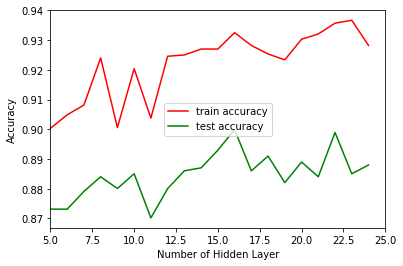

In [7]:
plt.show()

In [8]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (20,20,20),(30,30,30),(50,50,50), (100,100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
clf.fit(X_train, y_train)

F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50, 50, 50), (20, 20, 20), (30, 30, 30), (50, 50, 50), (100, 100, 100)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [7]:
from sklearn.model_selection import GridSearchCV

In [13]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [43]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
             precision    recall  f1-score   support

          0       0.87      0.91      0.89       118
          1       0.92      0.88      0.90       135

avg / total       0.89      0.89      0.89       253



# SVC 

# grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10, verbose=0)
grid.fit(x, y)

print(grid.best_params_)
grid.best_score_

In [17]:
# each parameter setting do cross-validation:
for C in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        scores = cross_val_score(SVC(C=C, gamma=gamma), x, y, cv=10)
        print("C: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores)))

C: 0.001000, gamma: 0.001000, average score: 0.504455
C: 0.001000, gamma: 0.010000, average score: 0.504455
C: 0.001000, gamma: 0.100000, average score: 0.504455
C: 0.001000, gamma: 1.000000, average score: 0.504455
C: 0.010000, gamma: 0.001000, average score: 0.504455
C: 0.010000, gamma: 0.010000, average score: 0.602614
C: 0.010000, gamma: 0.100000, average score: 0.746267
C: 0.010000, gamma: 1.000000, average score: 0.504455
C: 0.100000, gamma: 0.001000, average score: 0.616485
C: 0.100000, gamma: 0.010000, average score: 0.804713
C: 0.100000, gamma: 0.100000, average score: 0.845317
C: 0.100000, gamma: 1.000000, average score: 0.533168
C: 1.000000, gamma: 0.001000, average score: 0.819584
C: 1.000000, gamma: 0.010000, average score: 0.869139
C: 1.000000, gamma: 0.100000, average score: 0.889931
C: 1.000000, gamma: 1.000000, average score: 0.755188
C: 10.000000, gamma: 0.001000, average score: 0.861238
C: 10.000000, gamma: 0.010000, average score: 0.899921
C: 10.000000, gamma: 0.100

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, mlp.predict(X_test)))


             precision    recall  f1-score   support

          0       0.98      0.98      0.98       128
          1       0.98      0.98      0.98       125

avg / total       0.98      0.98      0.98       253



from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

# Featue Eng

In [16]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [17]:
x.shape

(1009, 36)

In [19]:
x1=sel.fit_transform(x)
x1.shape

(1009, 12)

In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    x1, y, stratify=y, random_state=42)

In [21]:
###### finding best parameters for svm manually with cross validation #######
highestscore=0
cc=0
gg=0 

clist = [0.001,0.01,1,10,100,200,300]
gammalist = [0.01,0.5,1,5,10]

for c in clist:
    for g in gammalist:
        svm= SVC(C=c, gamma=g)
        scores = cross_val_score(svm, X1_train, y1_train, cv=5, scoring='accuracy')
        print("trees: %d, depth leaf:%d, average score: %f" % (c,g,scores.mean()))
        if highestscore < scores.mean():
            cc=c
            gg=g
            highestscore=scores.mean()
        
print(cc)
print(gg)
print(highestscore)

##### using grid search with cross validation and using best esitmator of svm for testing #######
grid_param = {'C': np.array([0.001,0.01,1,10,100,200,300]) , 'gamma':np.array([0.01,0.5,1,5,10])}
svm = SVC()
svmgdsr = GridSearchCV(estimator=svm,param_grid=grid_param,scoring='accuracy',cv=5,n_jobs=-1)
svmgdsr.fit(X1_train, y1_train)
print(svmgdsr.best_params_)
print(svmgdsr.best_score_)
print(svmgdsr.best_estimator_)
bestparamsvm=svmgdsr.best_estimator_
bestparamsvm.score(X1_test, y1_test)

trees: 0, depth leaf:0, average score: 0.503965
trees: 0, depth leaf:0, average score: 0.503965
trees: 0, depth leaf:1, average score: 0.503965
trees: 0, depth leaf:5, average score: 0.503965
trees: 0, depth leaf:10, average score: 0.503965
trees: 0, depth leaf:0, average score: 0.530437
trees: 0, depth leaf:0, average score: 0.503965
trees: 0, depth leaf:1, average score: 0.503965
trees: 0, depth leaf:5, average score: 0.503965
trees: 0, depth leaf:10, average score: 0.503965
trees: 1, depth leaf:0, average score: 0.809507
trees: 1, depth leaf:0, average score: 0.837348
trees: 1, depth leaf:1, average score: 0.814840
trees: 1, depth leaf:5, average score: 0.669449
trees: 1, depth leaf:10, average score: 0.551595
trees: 10, depth leaf:0, average score: 0.828059
trees: 10, depth leaf:0, average score: 0.837356
trees: 10, depth leaf:1, average score: 0.813524
trees: 10, depth leaf:5, average score: 0.681335
trees: 10, depth leaf:10, average score: 0.551595
trees: 100, depth leaf:0, avera

0.86956521739130432

In [23]:
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=19)
fit = test.fit(x, y)
# summarize scores
numpy.set_printoptions(precision=3)
#print(fit.scores_)
features = fit.transform(x)
# summarize selected features
#print(features[0:5,:])


In [24]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(features, y)

#print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
#print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(cross_val_score(tree, features, y, cv=10, scoring='accuracy').mean())

0.863217821782
